# *_Metrics for porous material_*

### This proyect has as objective find metrics for sintetycal porous material, that is used like a replace of skin.

### We uses six images, three of them are a good samples, otherwise the other threes are bad samples

## 1) Importation <a class="anchor" id="first-bullet"></a>

importation of the six images
the good images and bad images are noted as g1,g2,g3,b1,b2,b3 respectly 

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import porespy as ps
from PIL import Image
import imageio as io

In [2]:
g1=io.imread('samples/Buena1.tif')
g2=io.imread('samples/Buena2.tif')
g3=io.imread('samples/Buena3.tif')
b1=io.imread('samples/Defecto1.tif')
b2=io.imread('samples/Defecto2.tif')
b3=io.imread('samples/Defecto3.tif')

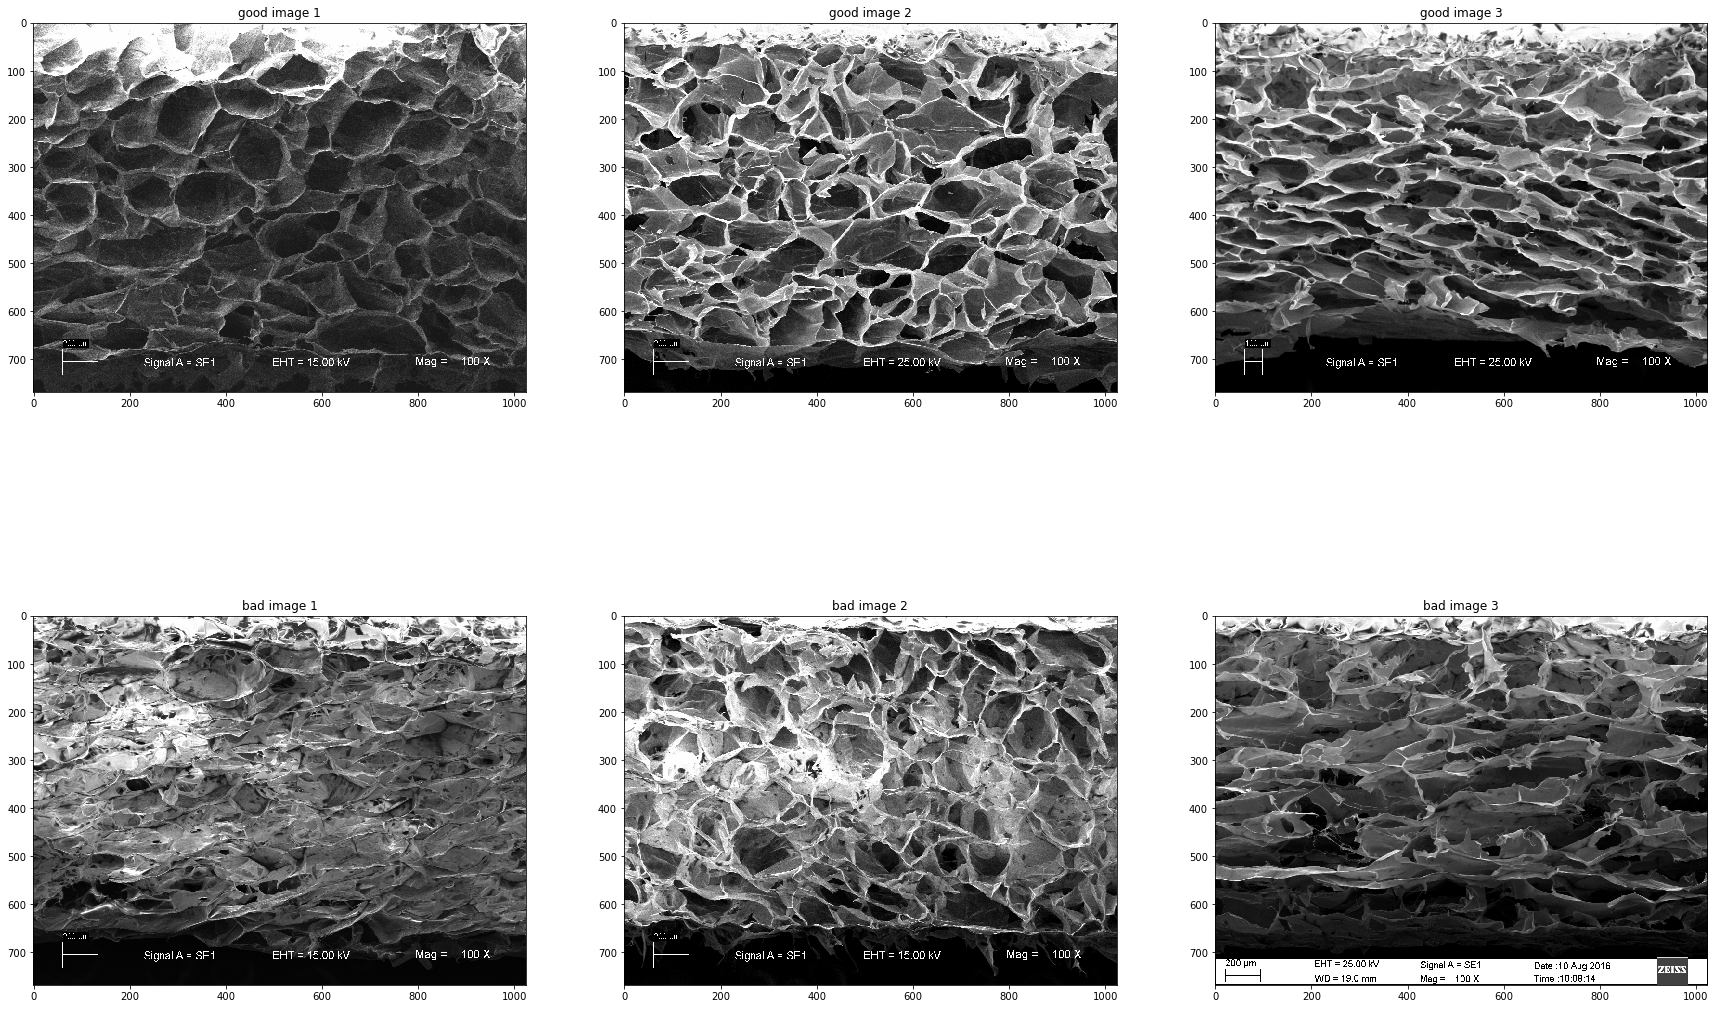

In [3]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
axs[0,0].imshow(g1)
axs[0,0].set_title("good image 1")
axs[0,1].imshow(g2)
axs[0,1].set_title("good image 2")
axs[0,2].imshow(g3)
axs[0,2].set_title("good image 3")
axs[1,0].imshow(b1)
axs[1,0].set_title("bad image 1")
axs[1,1].imshow(b2)
axs[1,1].set_title("bad image 2")
axs[1,2].imshow(b3)
axs[1,2].set_title("bad image 3")

plt.show()

## 2) Filters

In [4]:
import cv2

In [5]:
g1.shape

(768, 1024, 3)

In [6]:
g1=g1[:,:,0]
g2=g2[:,:,0]
g3=g3[:,:,0]
b1=b1[:,:,0]
b2=b2[:,:,0]
b3=b3[:,:,0]

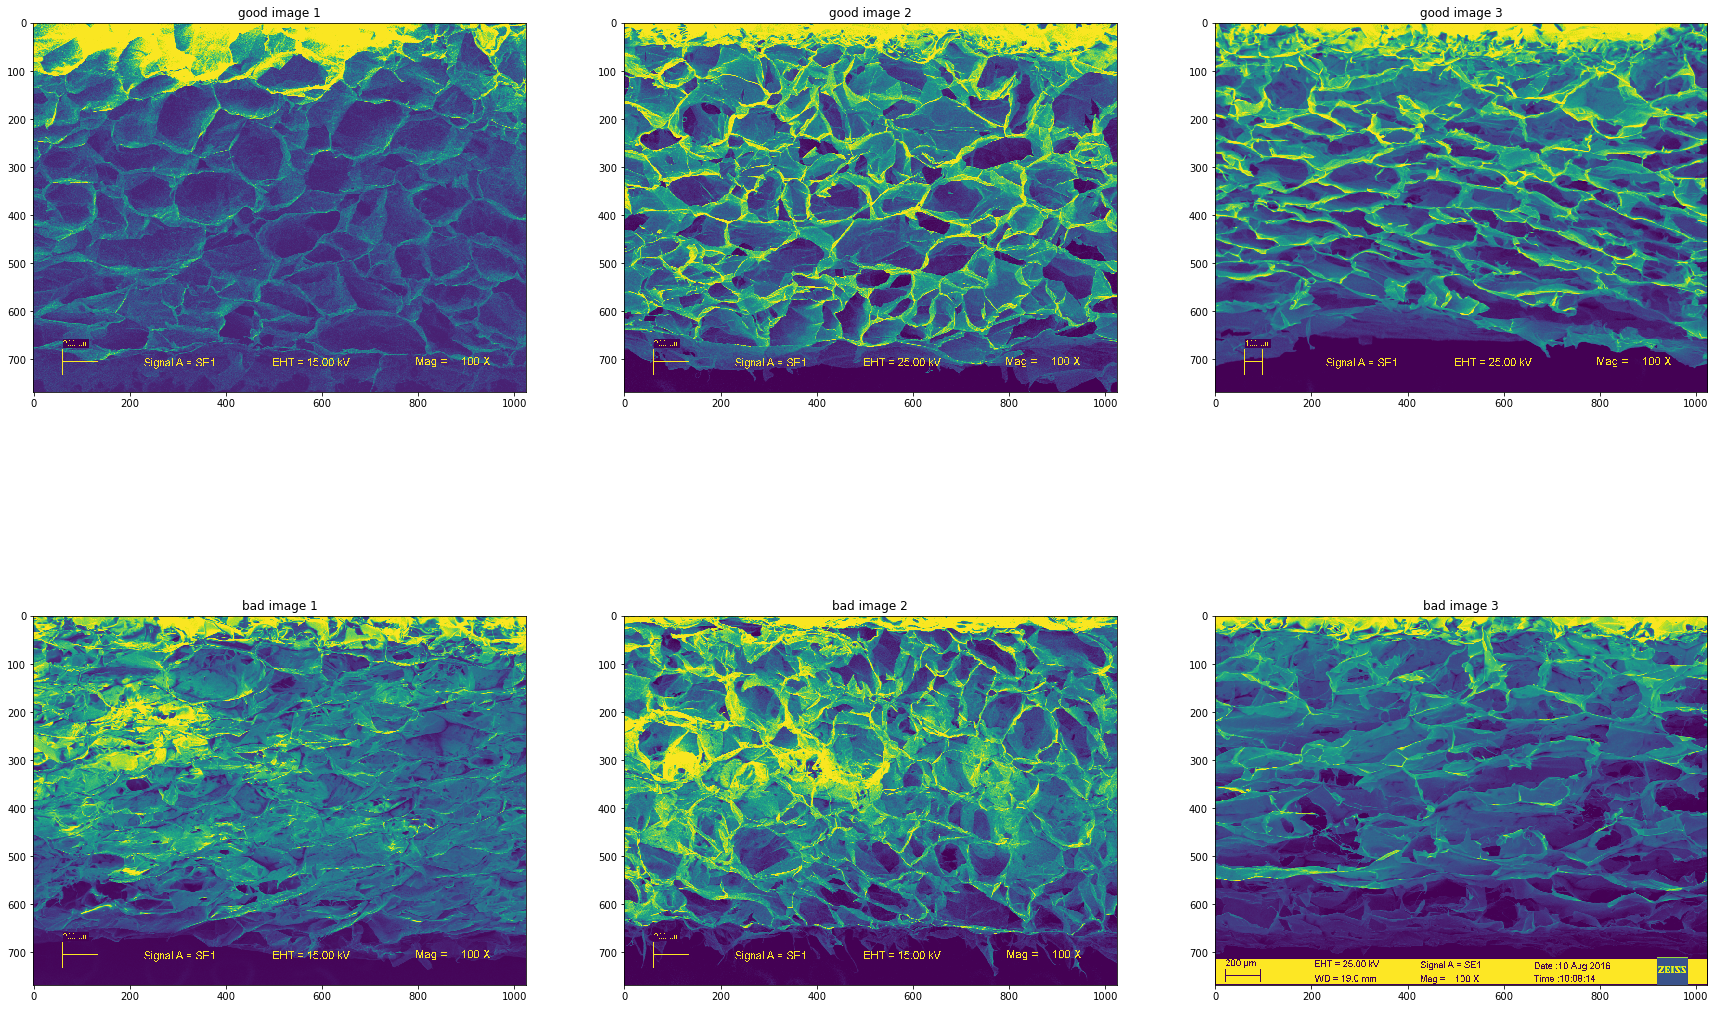

In [7]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
axs[0,0].imshow(g1)
axs[0,0].set_title("good image 1")
axs[0,1].imshow(g2)
axs[0,1].set_title("good image 2")
axs[0,2].imshow(g3)
axs[0,2].set_title("good image 3")
axs[1,0].imshow(b1)
axs[1,0].set_title("bad image 1")
axs[1,1].imshow(b2)
axs[1,1].set_title("bad image 2")
axs[1,2].imshow(b3)
axs[1,2].set_title("bad image 3")

plt.show()

In [8]:
(thresh, g1b) = cv2.threshold(g1, 40, 255, cv2.THRESH_BINARY)
(thresh, g2b) = cv2.threshold(g2, 60, 255, cv2.THRESH_BINARY)
(thresh, g3b) = cv2.threshold(g3, 60, 255, cv2.THRESH_BINARY)
(thresh, b1b) = cv2.threshold(b1, 60, 255, cv2.THRESH_BINARY)
(thresh, b2b) = cv2.threshold(b2, 60, 255, cv2.THRESH_BINARY)
(thresh, b3b) = cv2.threshold(b3, 60, 255, cv2.THRESH_BINARY)

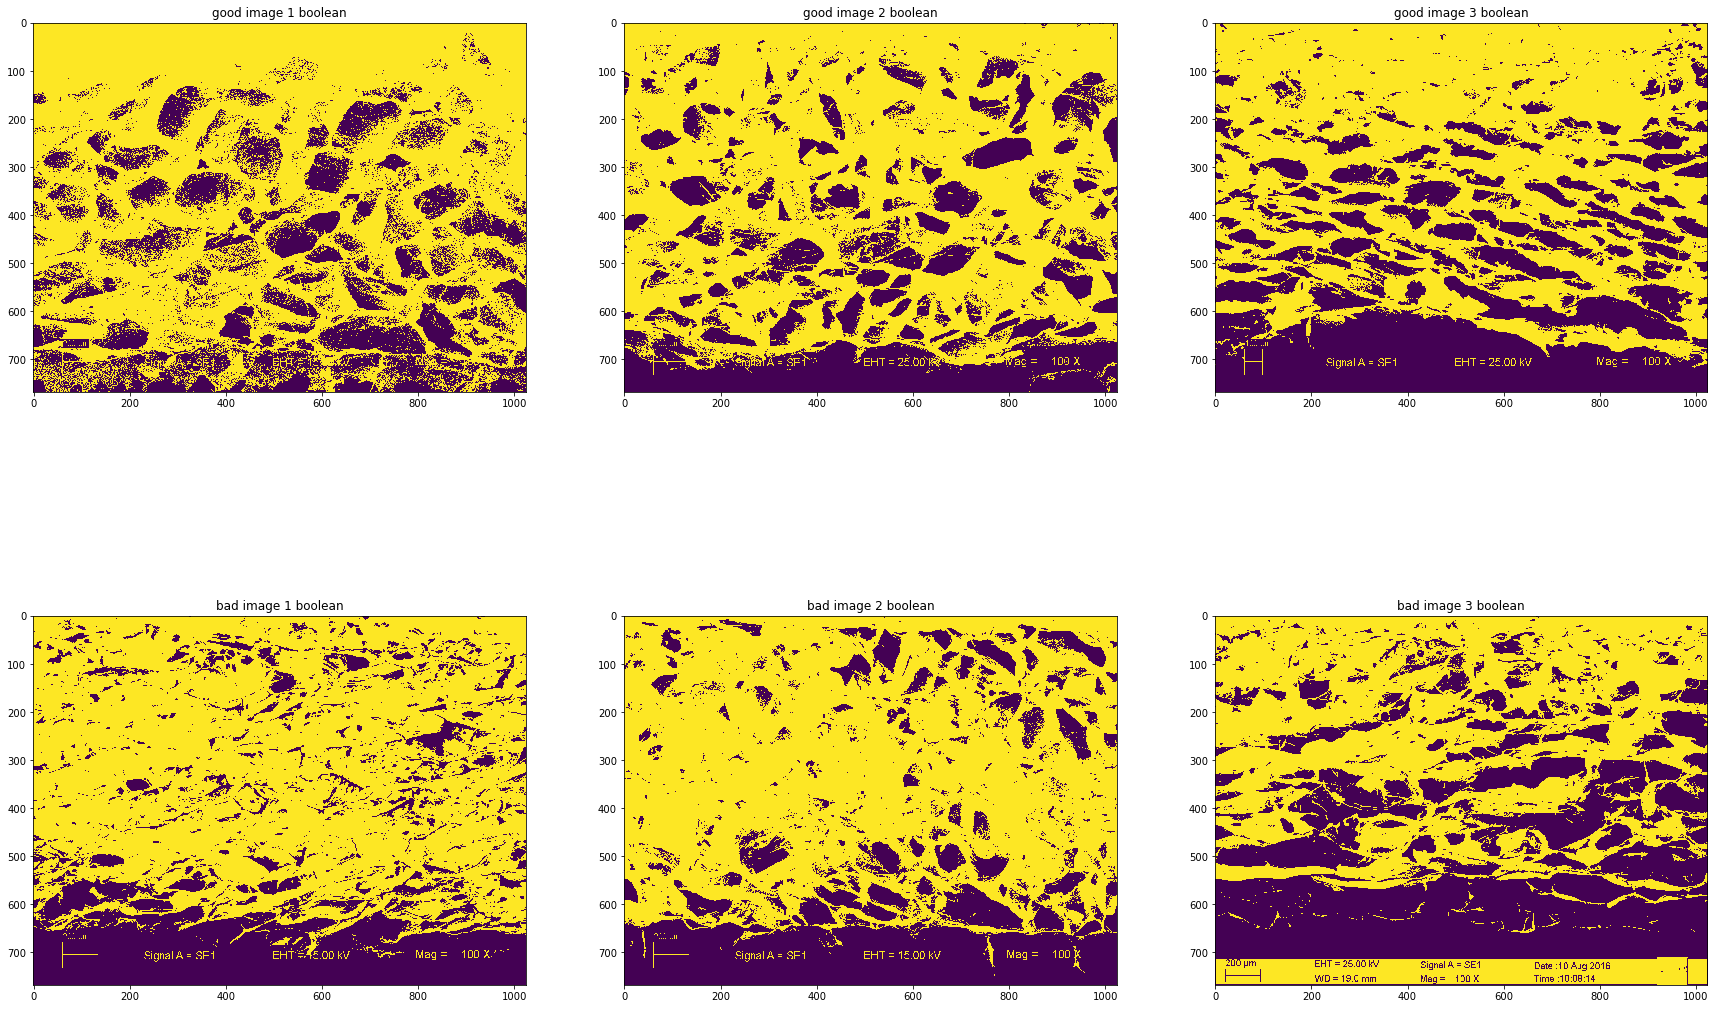

In [9]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
axs[0,0].imshow(g1b)
axs[0,0].set_title("good image 1 boolean")
axs[0,1].imshow(g2b)
axs[0,1].set_title("good image 2 boolean")
axs[0,2].imshow(g3b)
axs[0,2].set_title("good image 3 boolean")
axs[1,0].imshow(b1b)
axs[1,0].set_title("bad image 1 boolean")
axs[1,1].imshow(b2b)
axs[1,1].set_title("bad image 2 boolean")
axs[1,2].imshow(b3b)
axs[1,2].set_title("bad image 3 boolean")

plt.show()

### Porosimetry filter <a class="anchor" id="second-bullet"></a>

In [10]:
g1p=ps.filters.porosimetry(g1b, access_limited=False)
g2p=ps.filters.porosimetry(g2b, access_limited=False)
g3p=ps.filters.porosimetry(g3b, access_limited=False)
b1p=ps.filters.porosimetry(b1b, access_limited=False)
b2p=ps.filters.porosimetry(b2b, access_limited=False)
b3p=ps.filters.porosimetry(b3b, access_limited=False)


100%|██████████| 25/25 [00:01<00:00, 23.44it/s]


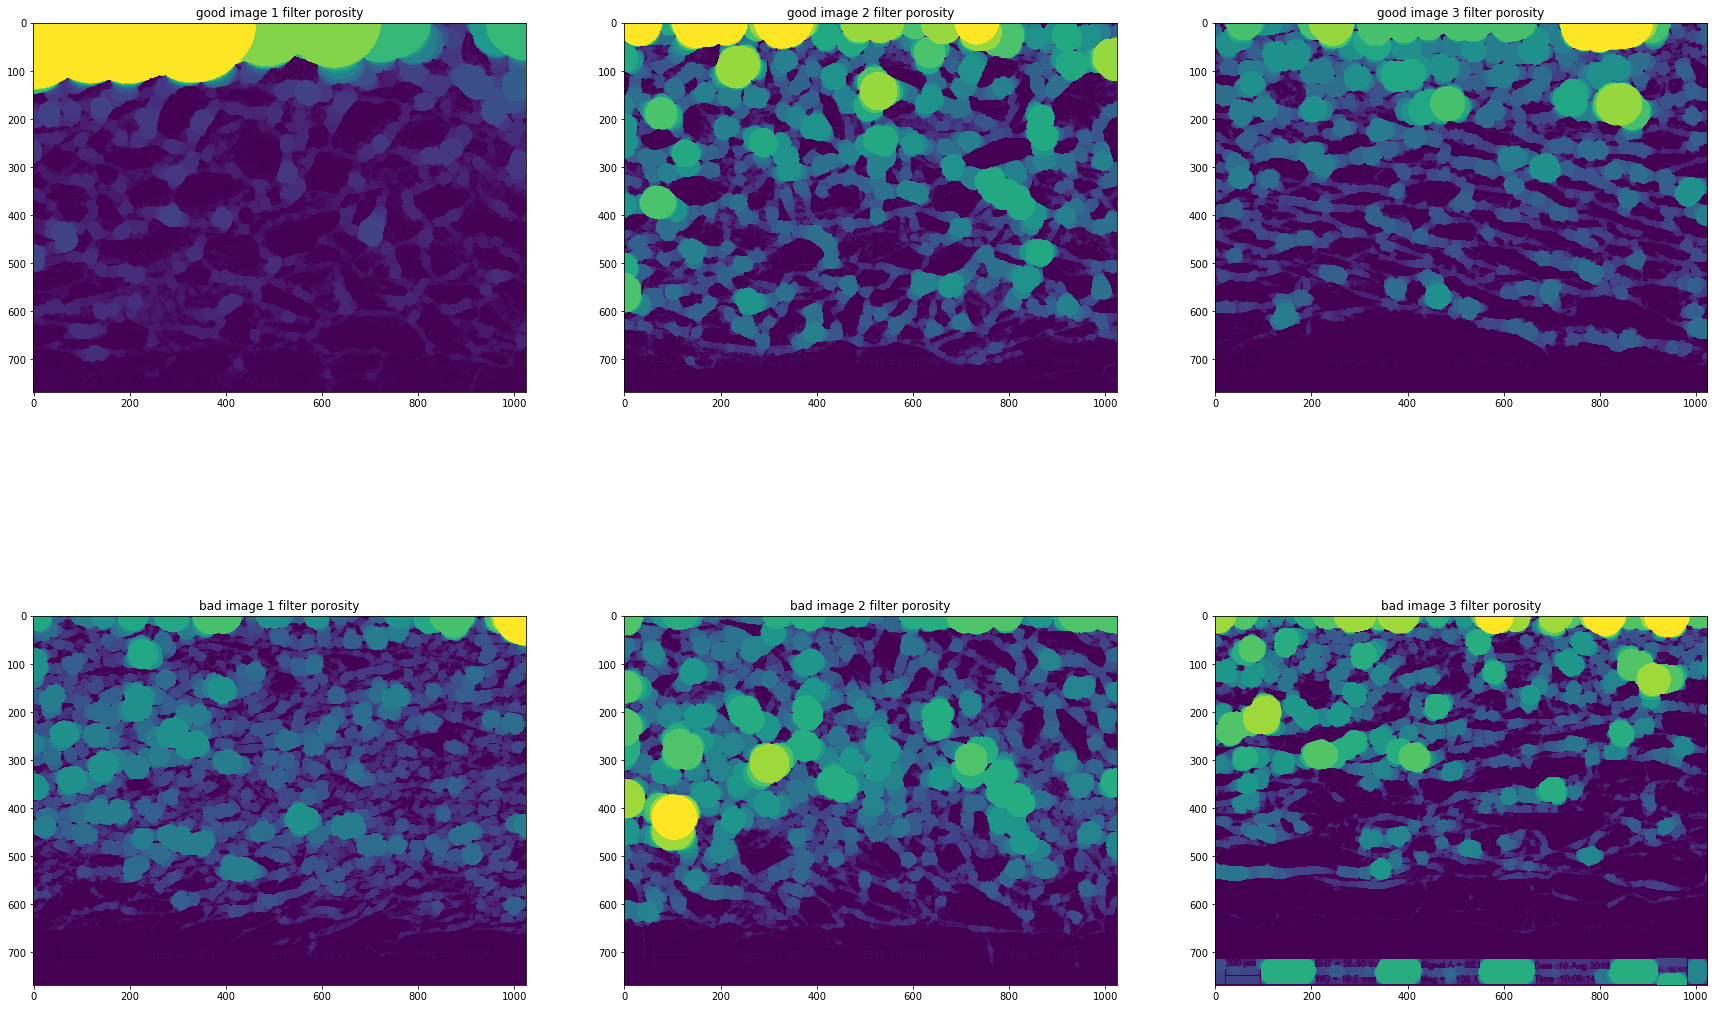

In [11]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
axs[0,0].imshow(g1p)
axs[0,0].set_title("good image 1 filter porosity")
axs[0,1].imshow(g2p)
axs[0,1].set_title("good image 2 filter porosity")
axs[0,2].imshow(g3p)
axs[0,2].set_title("good image 3 filter porosity")
axs[1,0].imshow(b1p)
axs[1,0].set_title("bad image 1 filter porosity")
axs[1,1].imshow(b2p)
axs[1,1].set_title("bad image 2 filter porosity")
axs[1,2].imshow(b3p)
axs[1,2].set_title("bad image 3 filter porosity")

plt.show()

In [12]:
g1d= ps.metrics.pore_size_distribution(g1p)
g2d= ps.metrics.pore_size_distribution(g2p)
g3d= ps.metrics.pore_size_distribution(g3p)
b1d= ps.metrics.pore_size_distribution(b1p)
b2d= ps.metrics.pore_size_distribution(b2p)
b3d= ps.metrics.pore_size_distribution(b3p)

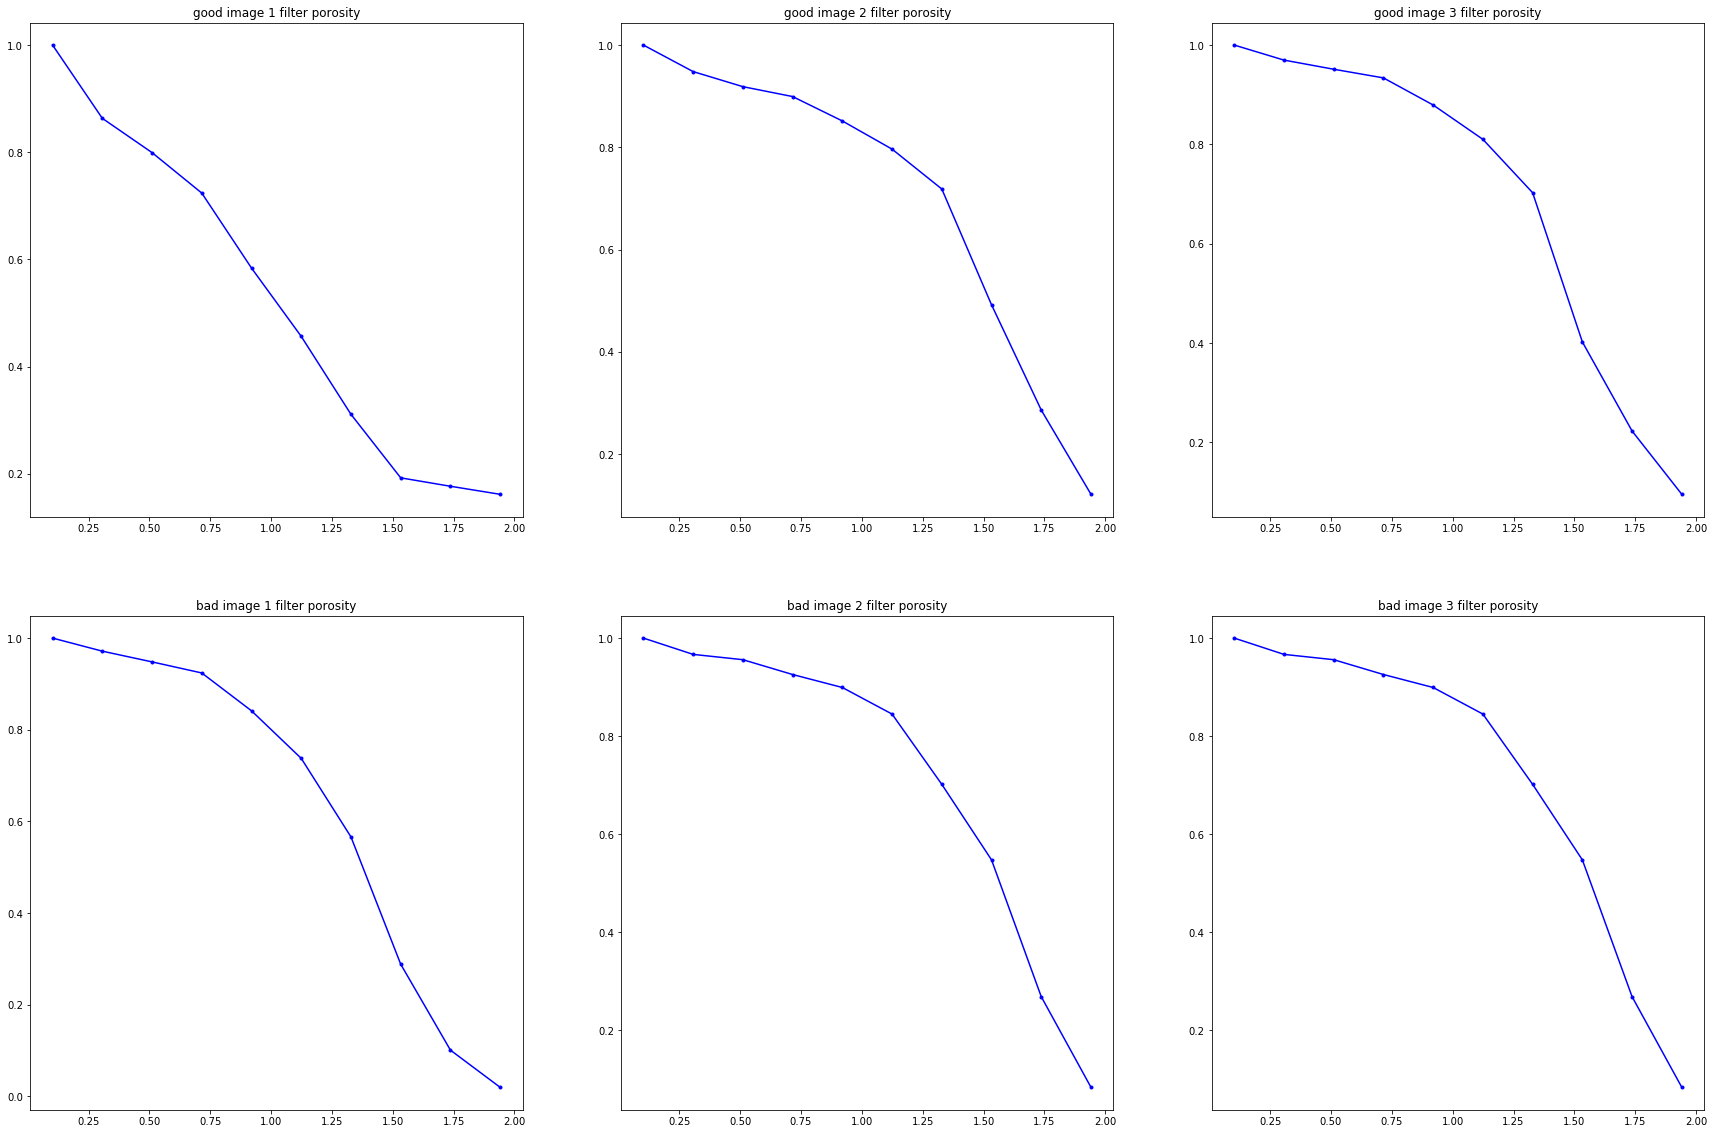

In [13]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
axs[0,0].plot(g1d.logR, g1d.cdf, 'b.-', label='mip')
axs[0,0].set_title("good image 1 filter porosity")
axs[0,1].plot(g1d.logR, g2d.cdf, 'b.-', label='mip')
axs[0,1].set_title("good image 2 filter porosity")
axs[0,2].plot(g1d.logR, g3d.cdf, 'b.-', label='mip')
axs[0,2].set_title("good image 3 filter porosity")
axs[1,0].plot(g1d.logR, b1d.cdf, 'b.-', label='mip')
axs[1,0].set_title("bad image 1 filter porosity")
axs[1,1].plot(g1d.logR, b2d.cdf, 'b.-', label='mip')
axs[1,1].set_title("bad image 2 filter porosity")
axs[1,2].plot(g1d.logR, b2d.cdf, 'b.-', label='mip')
axs[1,2].set_title("bad image 3 filter porosity")

plt.show()

### fftMorphology filter

In [14]:
from skimage.morphology import disk

In [15]:
g1fm1=ps.filters.fftmorphology(g1b,strel=disk(1), mode='dilation')
g1fm2=ps.filters.fftmorphology(g1b,strel=disk(1), mode='erosion')
g1fm3=ps.filters.fftmorphology(g1b,strel=disk(1), mode='opening')
g1fm4=ps.filters.fftmorphology(g1b,strel=disk(1), mode='closing')

g2p=ps.filters.fftmorphology(g2b,strel=disk(1), mode='opening')
g3p=ps.filters.fftmorphology(g3b,strel=disk(1), mode='opening')
b1p=ps.filters.fftmorphology(b1b,strel=disk(1), mode='opening')
b2p=ps.filters.fftmorphology(b2b,strel=disk(1), mode='opening')
b3p=ps.filters.fftmorphology(b3b,strel=disk(1), mode='opening')

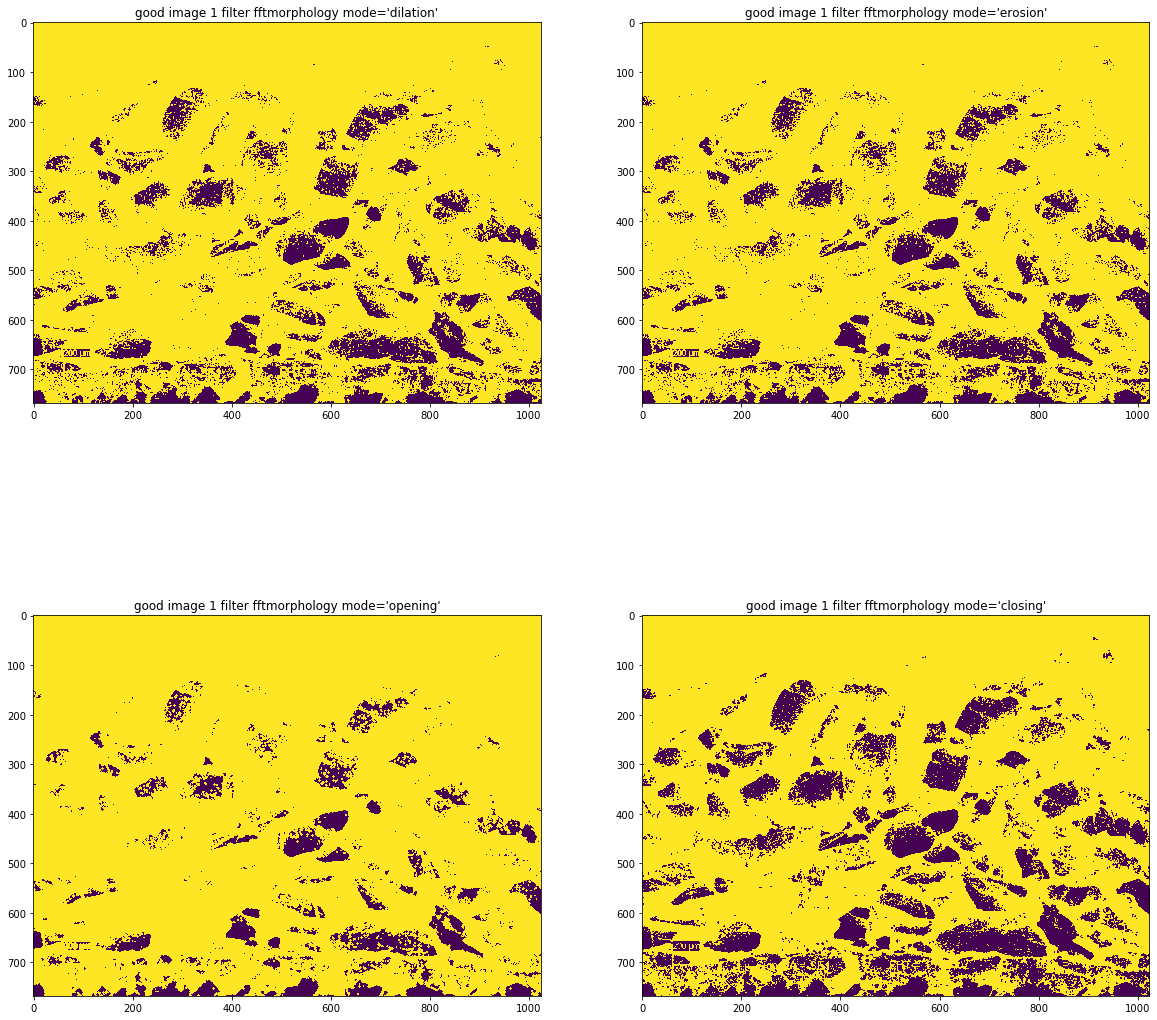

In [16]:
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0,0].imshow(g1fm1)
axs[0,0].set_title("good image 1 filter fftmorphology mode='dilation'")
axs[0,1].imshow(g1fm2)
axs[0,1].set_title("good image 1 filter fftmorphology mode='erosion'")
axs[1,0].imshow(g1fm3)
axs[1,0].set_title("good image 1 filter fftmorphology mode='opening'")
axs[1,1].imshow(g1fm4)
axs[1,1].set_title("good image 1 filter fftmorphology mode='closing'")
plt.show()

In [17]:
g2fm1=ps.filters.fftmorphology(g2b,strel=disk(1), mode='dilation')
g2fm2=ps.filters.fftmorphology(g2b,strel=disk(1), mode='erosion')
g2fm3=ps.filters.fftmorphology(g2b,strel=disk(1), mode='opening')
g2fm4=ps.filters.fftmorphology(g2b,strel=disk(1), mode='closing')

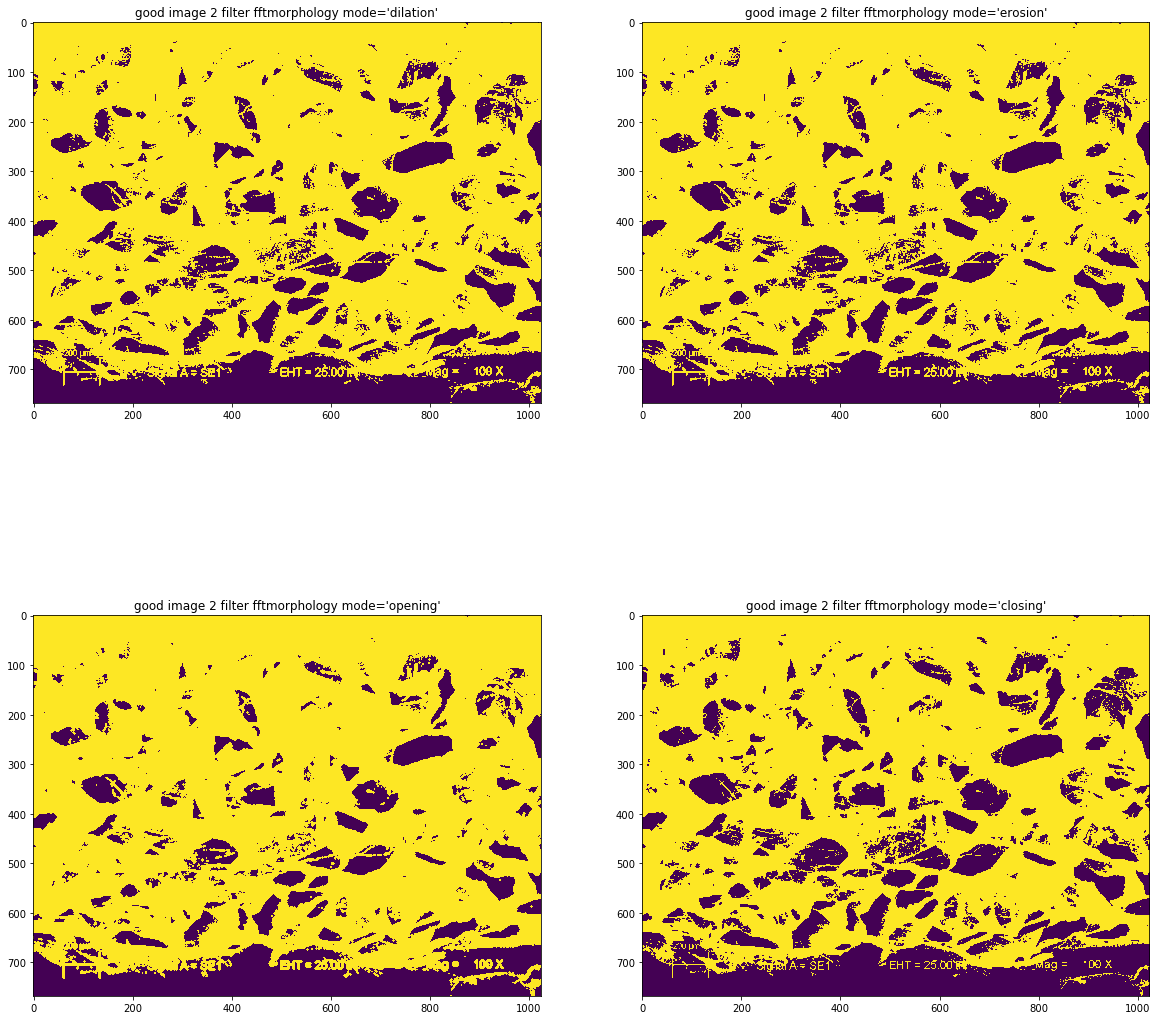

In [18]:
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0,0].imshow(g2fm1)
axs[0,0].set_title("good image 2 filter fftmorphology mode='dilation'")
axs[0,1].imshow(g2fm2)
axs[0,1].set_title("good image 2 filter fftmorphology mode='erosion'")
axs[1,0].imshow(g2fm3)
axs[1,0].set_title("good image 2 filter fftmorphology mode='opening'")
axs[1,1].imshow(g2fm4)
axs[1,1].set_title("good image 2 filter fftmorphology mode='closing'")
plt.show()

In [19]:
g3fm1=ps.filters.fftmorphology(g3b,strel=disk(1), mode='dilation')
g3fm2=ps.filters.fftmorphology(g3b,strel=disk(1), mode='erosion')
g3fm3=ps.filters.fftmorphology(g3b,strel=disk(1), mode='opening')
g3fm4=ps.filters.fftmorphology(g3b,strel=disk(1), mode='closing')

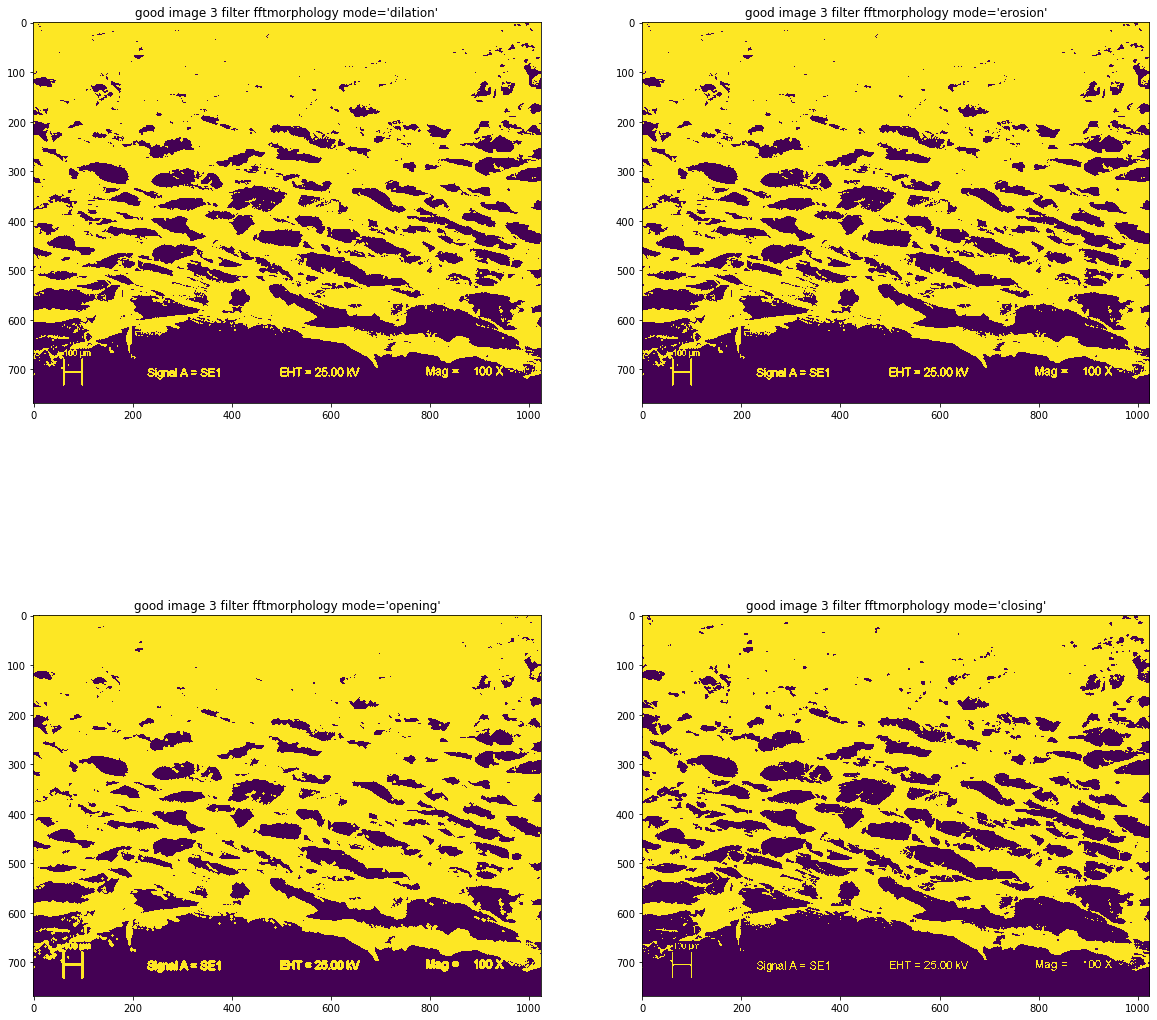

In [20]:
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0,0].imshow(g3fm1)
axs[0,0].set_title("good image 3 filter fftmorphology mode='dilation'")
axs[0,1].imshow(g3fm2)
axs[0,1].set_title("good image 3 filter fftmorphology mode='erosion'")
axs[1,0].imshow(g3fm3)
axs[1,0].set_title("good image 3 filter fftmorphology mode='opening'")
axs[1,1].imshow(g3fm4)
axs[1,1].set_title("good image 3 filter fftmorphology mode='closing'")
plt.show()

In [21]:
b1fm1=ps.filters.fftmorphology(b1b,strel=disk(1), mode='dilation')
b1fm2=ps.filters.fftmorphology(b1b,strel=disk(1), mode='erosion')
b1fm3=ps.filters.fftmorphology(b1b,strel=disk(1), mode='opening')
b1fm4=ps.filters.fftmorphology(b1b,strel=disk(1), mode='closing')

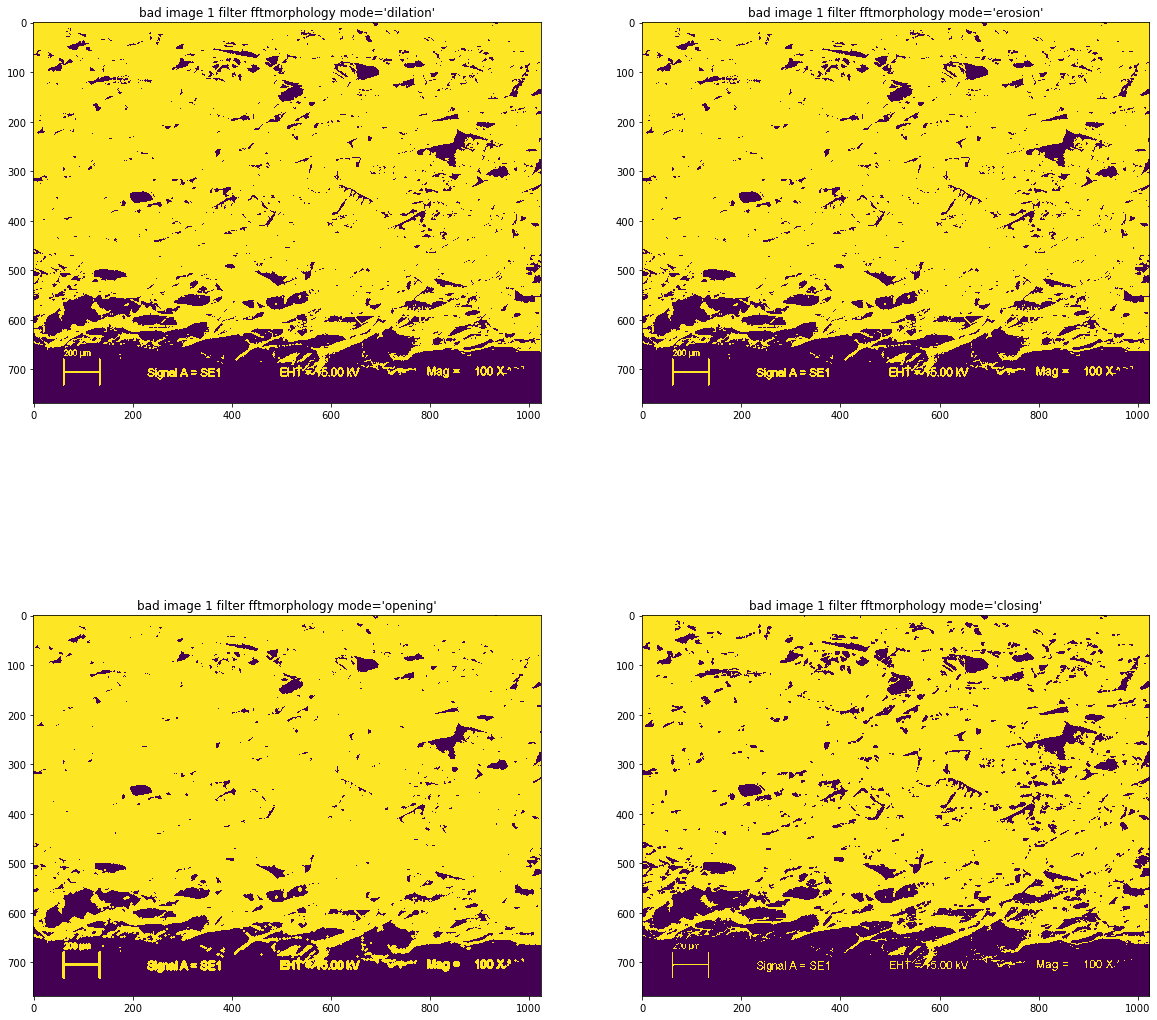

In [22]:
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0,0].imshow(b1fm1)
axs[0,0].set_title("bad image 1 filter fftmorphology mode='dilation'")
axs[0,1].imshow(b1fm2)
axs[0,1].set_title("bad image 1 filter fftmorphology mode='erosion'")
axs[1,0].imshow(b1fm3)
axs[1,0].set_title("bad image 1 filter fftmorphology mode='opening'")
axs[1,1].imshow(b1fm4)
axs[1,1].set_title("bad image 1 filter fftmorphology mode='closing'")
plt.show()

In [23]:
b2fm1=ps.filters.fftmorphology(b2b,strel=disk(1), mode='dilation')
b2fm2=ps.filters.fftmorphology(b2b,strel=disk(1), mode='erosion')
b2fm3=ps.filters.fftmorphology(b2b,strel=disk(1), mode='opening')
b2fm4=ps.filters.fftmorphology(b2b,strel=disk(1), mode='closing')

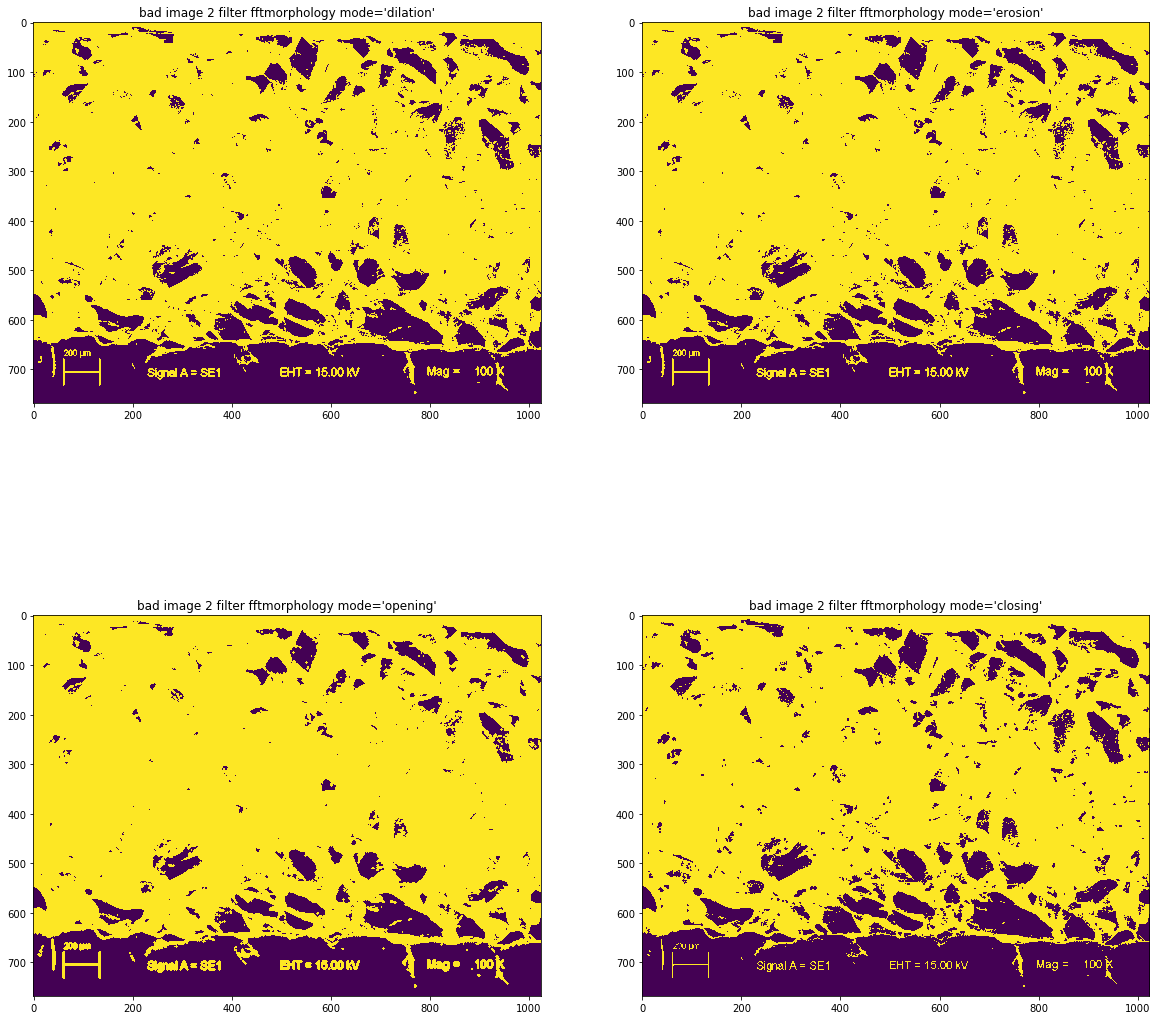

In [24]:
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0,0].imshow(b2fm1)
axs[0,0].set_title("bad image 2 filter fftmorphology mode='dilation'")
axs[0,1].imshow(b2fm2)
axs[0,1].set_title("bad image 2 filter fftmorphology mode='erosion'")
axs[1,0].imshow(b2fm3)
axs[1,0].set_title("bad image 2 filter fftmorphology mode='opening'")
axs[1,1].imshow(b2fm4)
axs[1,1].set_title("bad image 2 filter fftmorphology mode='closing'")
plt.show()

In [25]:
b3fm1=ps.filters.fftmorphology(b3b,strel=disk(1), mode='dilation')
b3fm2=ps.filters.fftmorphology(b3b,strel=disk(1), mode='erosion')
b3fm3=ps.filters.fftmorphology(b3b,strel=disk(1), mode='opening')
b3fm4=ps.filters.fftmorphology(b3b,strel=disk(1), mode='closing')

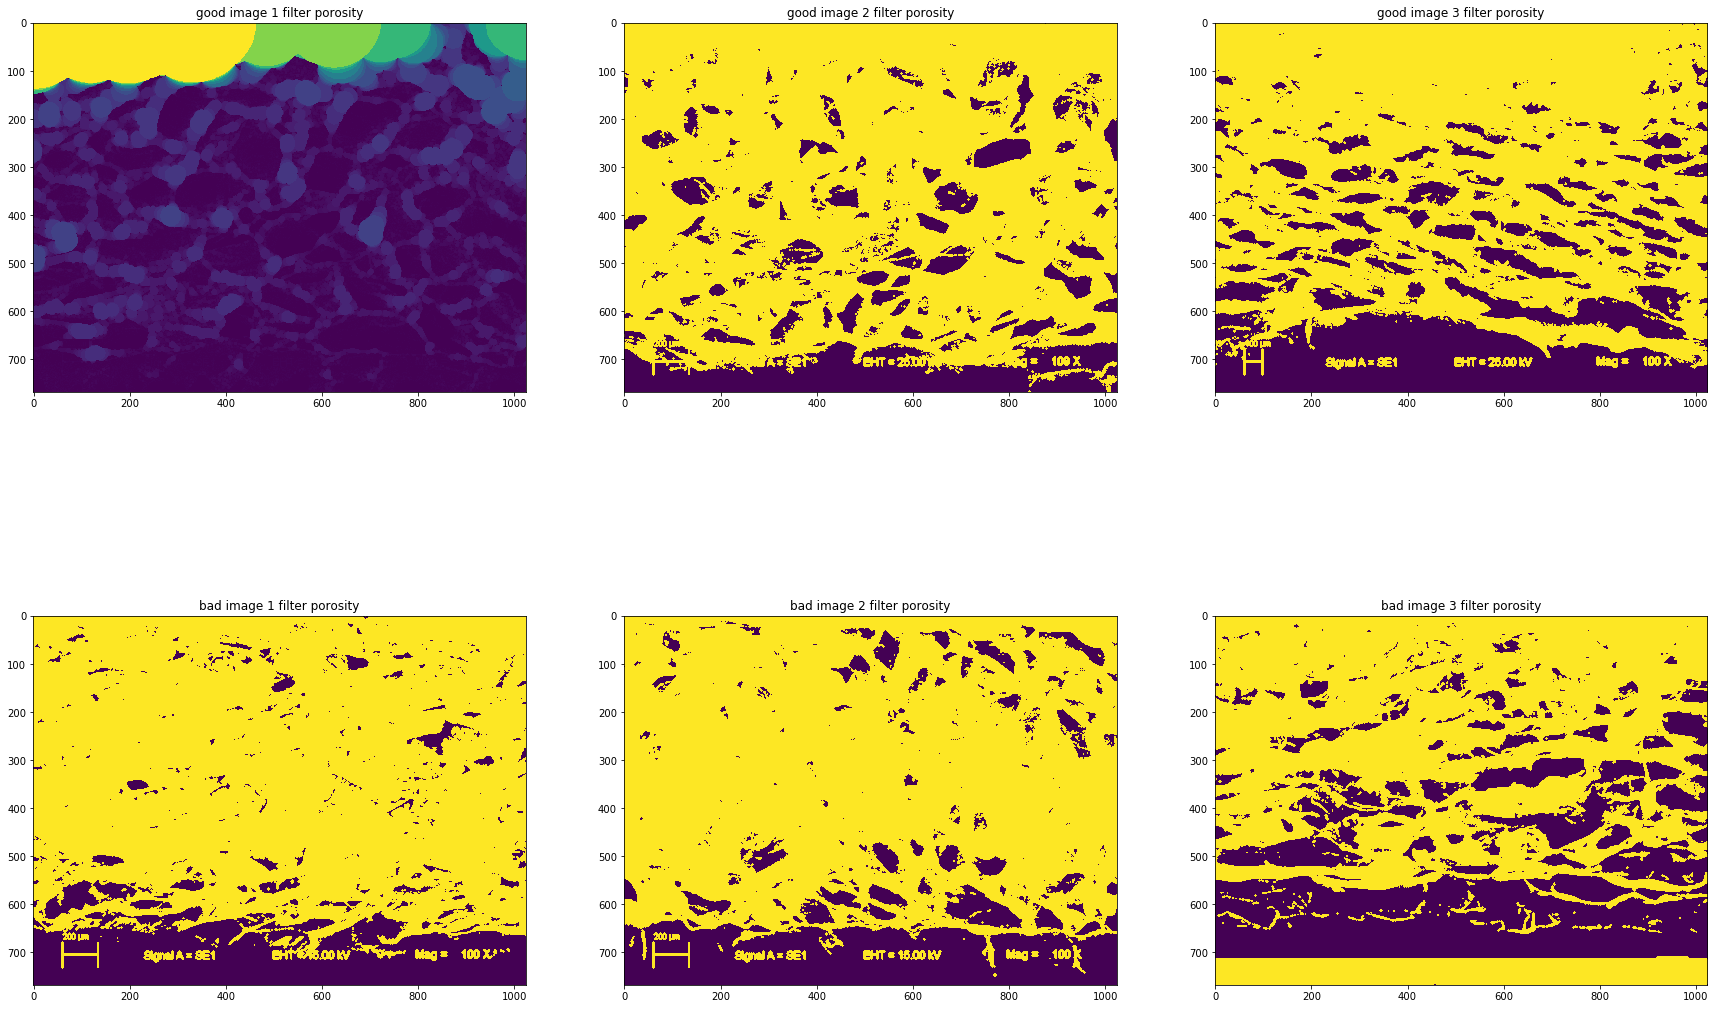

In [26]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
axs[0,0].imshow(g1p)
axs[0,0].set_title("good image 1 filter porosity")
axs[0,1].imshow(g2p)
axs[0,1].set_title("good image 2 filter porosity")
axs[0,2].imshow(g3p)
axs[0,2].set_title("good image 3 filter porosity")
axs[1,0].imshow(b1p)
axs[1,0].set_title("bad image 1 filter porosity")
axs[1,1].imshow(b2p)
axs[1,1].set_title("bad image 2 filter porosity")
axs[1,2].imshow(b3p)
axs[1,2].set_title("bad image 3 filter porosity")

plt.show()

### Fill blind pores filter

In [27]:
g1fb=ps.filters.fill_blind_pores(g1b)
g2fb=ps.filters.fill_blind_pores(g2b)
g3fb=ps.filters.fill_blind_pores(g3b)
b1fb=ps.filters.fill_blind_pores(b1b)
b2fb=ps.filters.fill_blind_pores(b2b)
b3fb=ps.filters.fill_blind_pores(b3b)


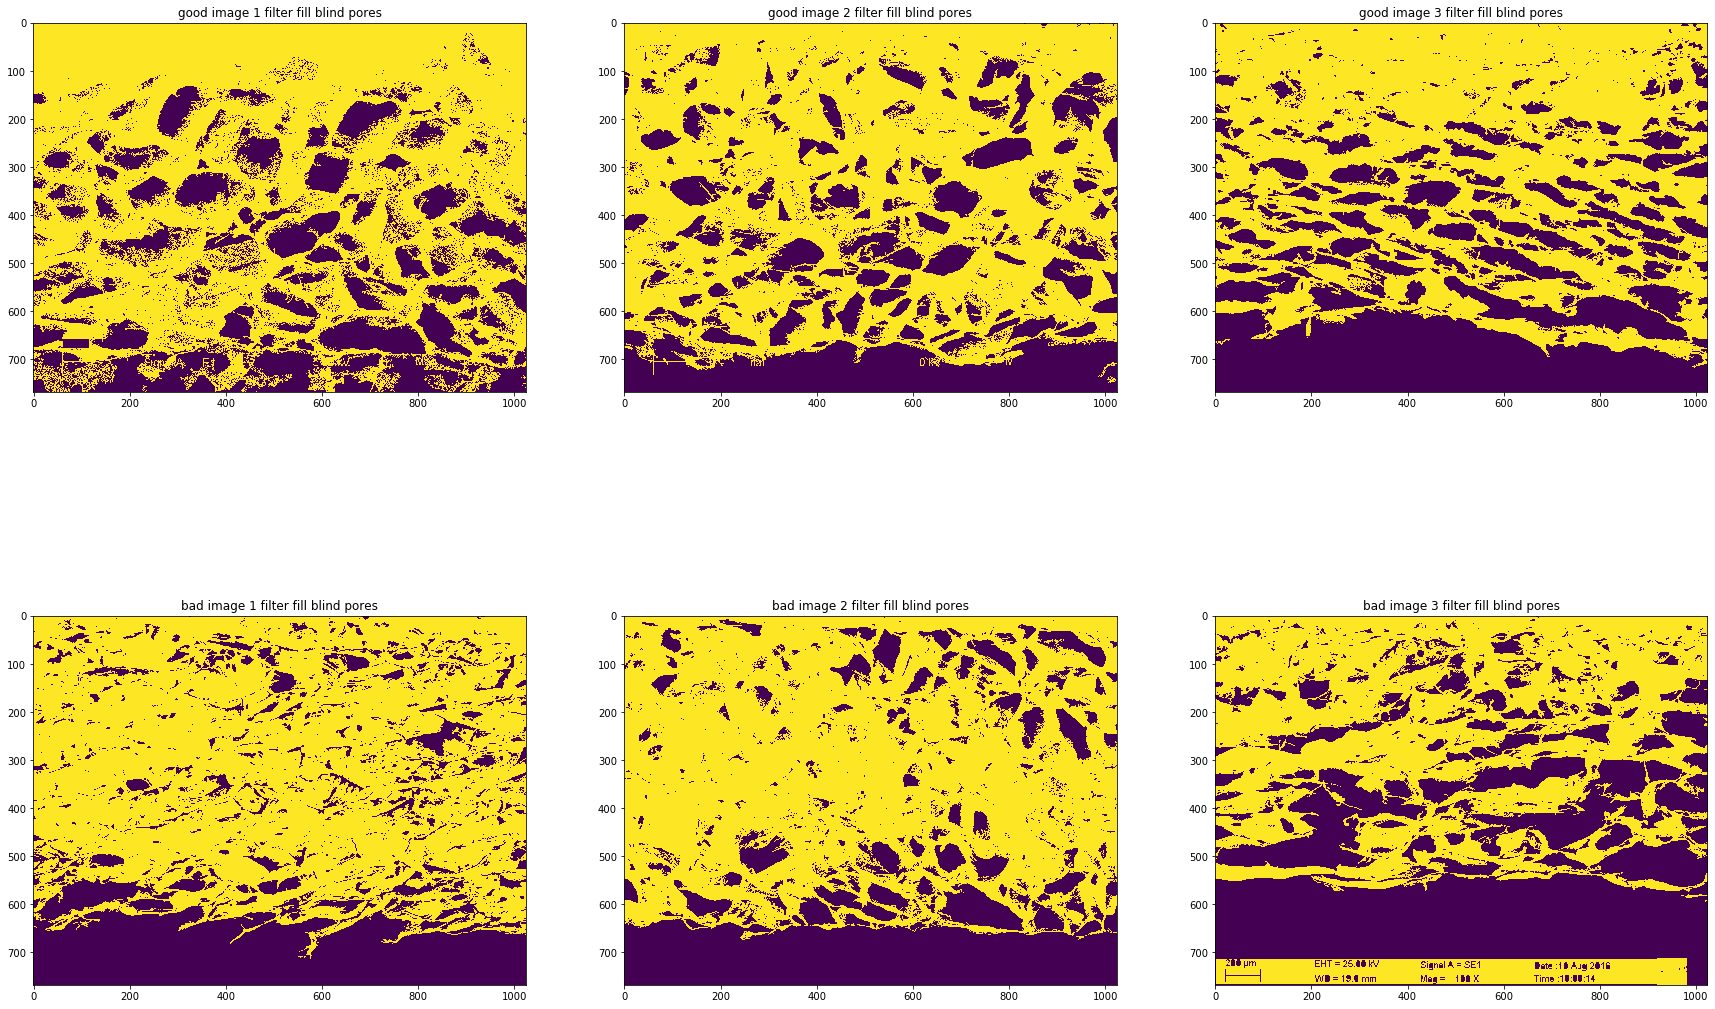

In [28]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
axs[0,0].imshow(g1fb)
axs[0,0].set_title("good image 1 filter fill blind pores")
axs[0,1].imshow(g2fb)
axs[0,1].set_title("good image 2 filter fill blind pores")
axs[0,2].imshow(g3fb)
axs[0,2].set_title("good image 3 filter fill blind pores")
axs[1,0].imshow(b1fb)
axs[1,0].set_title("bad image 1 filter fill blind pores")
axs[1,1].imshow(b2fb)
axs[1,1].set_title("bad image 2 filter fill blind pores")
axs[1,2].imshow(b3fb)
axs[1,2].set_title("bad image 3 filter fill blind pores")

plt.show()

## 3) Metrics

### Porosity profile

In [35]:
g1x = ps.metrics.porosity_profile(g1b, 0)
g1y = ps.metrics.porosity_profile(g1b, 1)
g2x = ps.metrics.porosity_profile(g2b, 0)
g2y = ps.metrics.porosity_profile(g2b, 1)
g3x = ps.metrics.porosity_profile(g3b, 0)
g3y = ps.metrics.porosity_profile(g3b, 1)
b1x = ps.metrics.porosity_profile(b1b, 0)
b1y = ps.metrics.porosity_profile(b1b, 1)
b2x = ps.metrics.porosity_profile(b2b, 0)
b2y = ps.metrics.porosity_profile(b2b, 1)
b3x = ps.metrics.porosity_profile(b3b, 0)
b3y = ps.metrics.porosity_profile(b3b, 1)

In [37]:
import scipy as sp


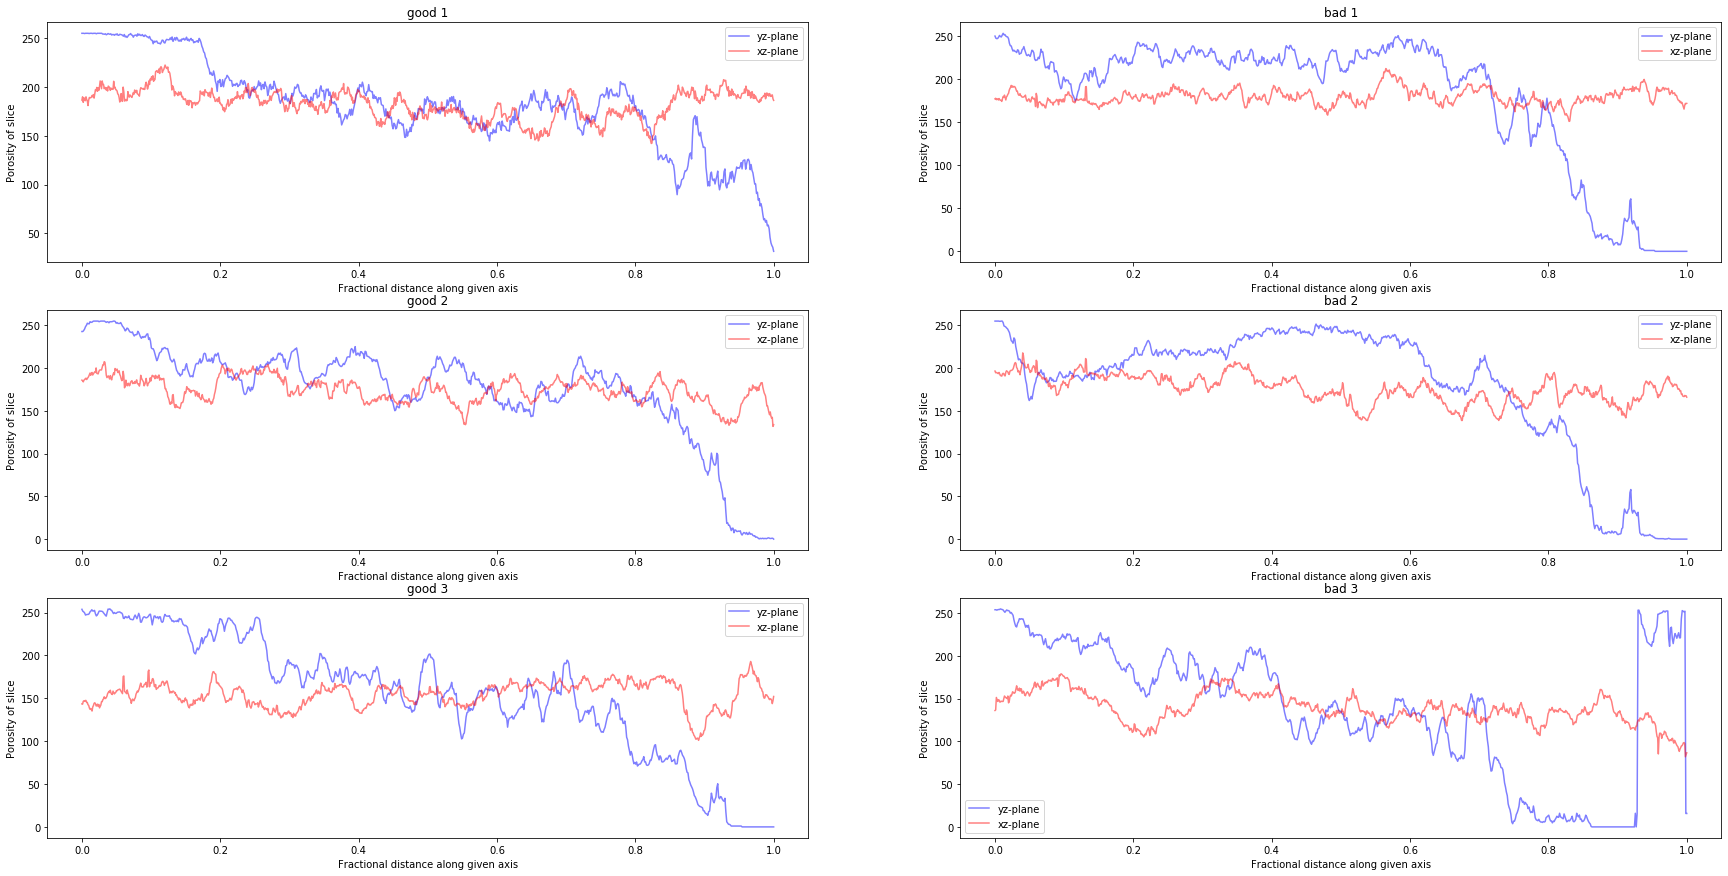

In [54]:
fig, axs = plt.subplots(3, 2,figsize=(30,15))

axs[0,0].plot(np.linspace(0, 1, g1b.shape[0]), g1x, 'b-', label='yz-plane', alpha=0.5)
axs[0,0].plot(np.linspace(0, 1, g1b.shape[1], g1b.shape[1]), g1y, 'r-', label='xz-plane', alpha=0.5)
axs[0,0].set_ylabel('Porosity of slice')
axs[0,0].set_xlabel('Fractional distance along given axis')
axs[0,0].set_title('good 1')
axs[0,0].legend()

axs[1,0].plot(np.linspace(0, 1, g2b.shape[0]), g2x, 'b-', label='yz-plane', alpha=0.5)
axs[1,0].plot(np.linspace(0, 1, g2b.shape[1], g2b.shape[1]), g2y, 'r-', label='xz-plane', alpha=0.5)
axs[1,0].set_ylabel('Porosity of slice')
axs[1,0].set_xlabel('Fractional distance along given axis')
axs[1,0].set_title('good 2')
axs[1,0].legend()

axs[2,0].plot(np.linspace(0, 1, g3b.shape[0]), g3x, 'b-', label='yz-plane', alpha=0.5)
axs[2,0].plot(np.linspace(0, 1, g3b.shape[1], g3b.shape[1]), g3y, 'r-', label='xz-plane', alpha=0.5)
axs[2,0].set_ylabel('Porosity of slice')
axs[2,0].set_xlabel('Fractional distance along given axis')
axs[2,0].set_title('good 3')
axs[2,0].legend()

axs[0,1].plot(np.linspace(0, 1, b1b.shape[0]), b1x, 'b-', label='yz-plane', alpha=0.5)
axs[0,1].plot(np.linspace(0, 1, b1b.shape[1], b1b.shape[1]), b1y, 'r-', label='xz-plane', alpha=0.5)
axs[0,1].set_ylabel('Porosity of slice')
axs[0,1].set_xlabel('Fractional distance along given axis')
axs[0,1].set_title('bad 1')
axs[0,1].legend()

axs[1,1].plot(np.linspace(0, 1, b2b.shape[0]), b2x, 'b-', label='yz-plane', alpha=0.5)
axs[1,1].plot(np.linspace(0, 1, b2b.shape[1], b2b.shape[1]), b2y, 'r-', label='xz-plane', alpha=0.5)
axs[1,1].set_ylabel('Porosity of slice')
axs[1,1].set_xlabel('Fractional distance along given axis')
axs[1,1].set_title('bad 2')
axs[1,1].legend()

axs[2,1].plot(np.linspace(0, 1, b3b.shape[0]), b3x, 'b-', label='yz-plane', alpha=0.5)
axs[2,1].plot(np.linspace(0, 1, b3b.shape[1], b3b.shape[1]), b3y, 'r-', label='xz-plane', alpha=0.5)
axs[2,1].set_ylabel('Porosity of slice')
axs[2,1].set_xlabel('Fractional distance along given axis')
axs[2,1].set_title('bad 3')
axs[2,1].legend()

plt.show()

### Pore size distribution

In [83]:
g1m_ps= ps.metrics.pore_size_distribution(g1p)
g2m_ps= ps.metrics.pore_size_distribution(g2p)
g3m_ps= ps.metrics.pore_size_distribution(g3p)
b1m_ps= ps.metrics.pore_size_distribution(b1p)
b2m_ps= ps.metrics.pore_size_distribution(b2p)
b3m_ps= ps.metrics.pore_size_distribution(b3p)

In [117]:
g2m_ps.cdf


array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [115]:
b1m_ps.satn

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

<BarContainer object of 10 artists>

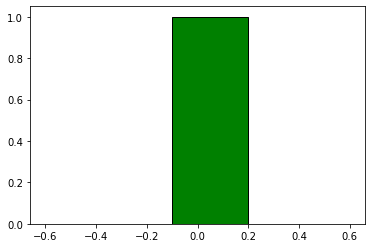

In [88]:
plt.bar(b1m_ps.logR, b1m_ps.satn, width=0.3,edgecolor='k',color='g')

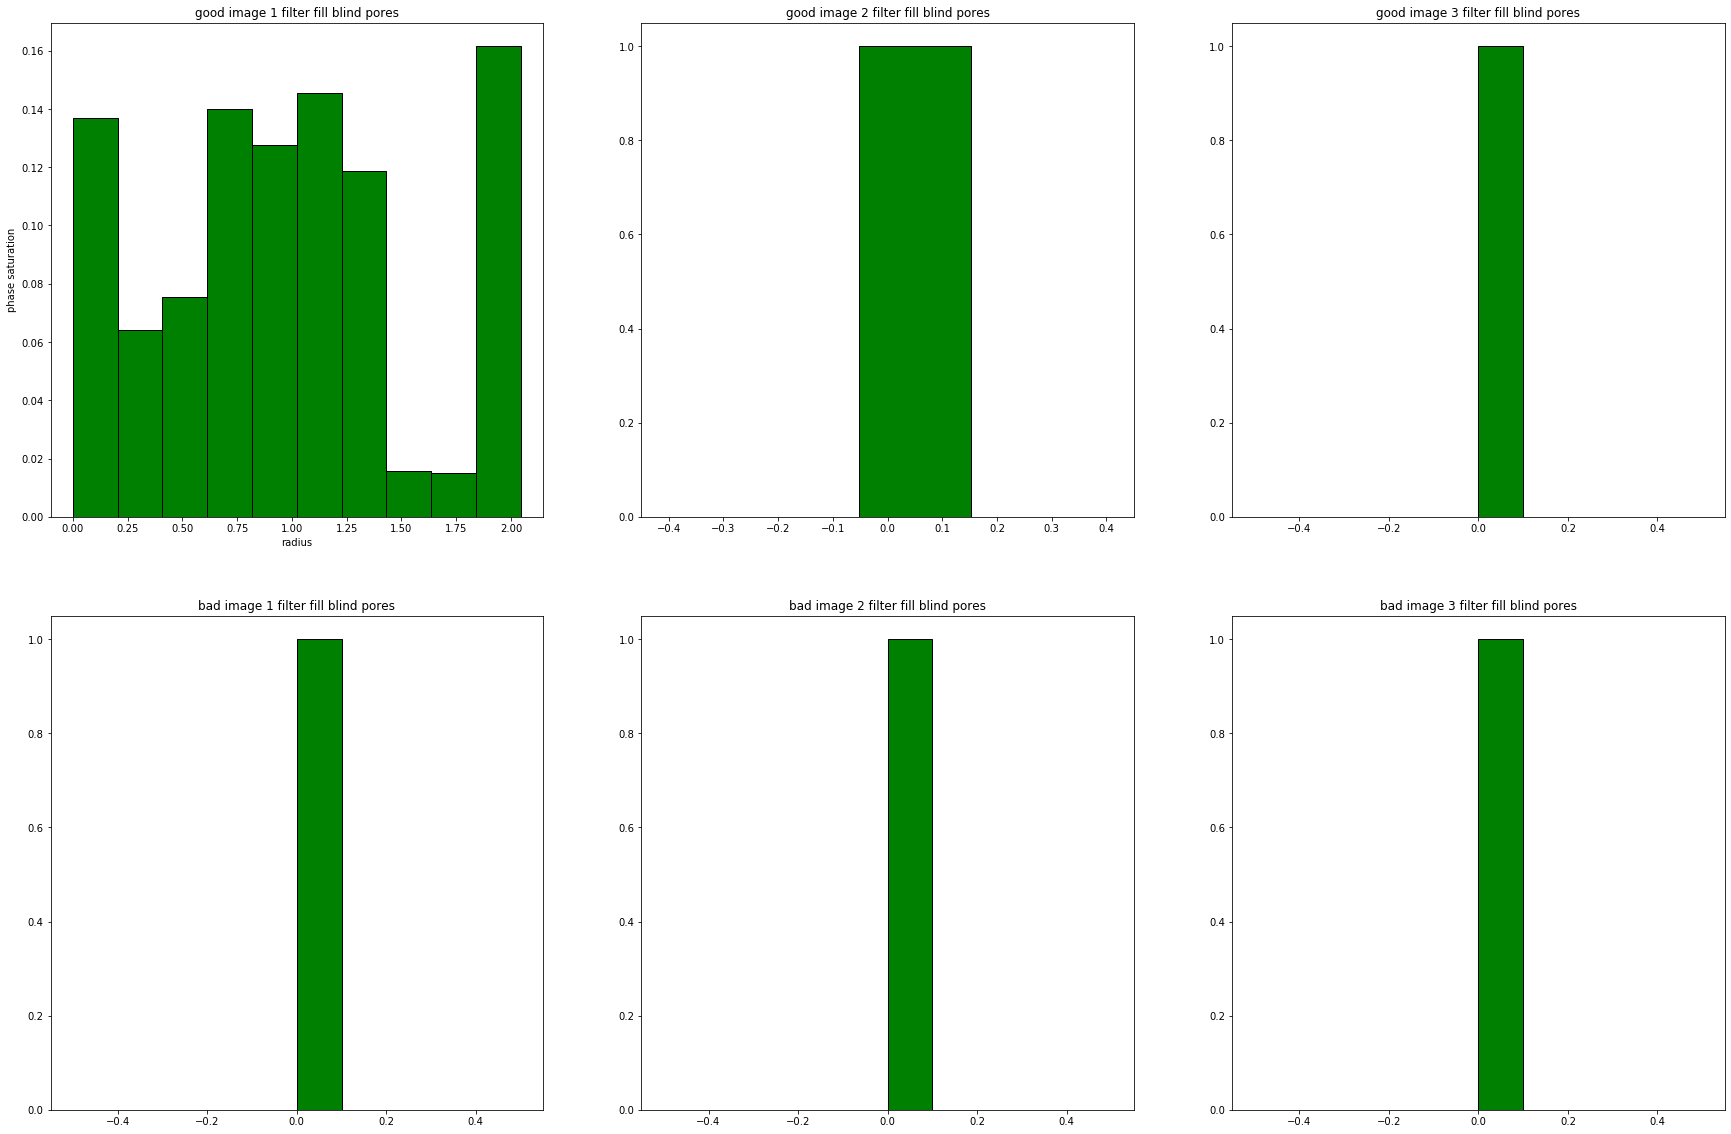

In [109]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
axs[0,0].bar(g1m_ps.logR, g1m_ps.satn, width=g1m_ps.bin_widths, edgecolor='k',color='g')
axs[0,0].set_title("good image 1 filter fill blind pores")
axs[0,0].set_xlabel('radius')
axs[0,0].set_ylabel('phase saturation')
axs[0,1].bar(g2m_ps.logR, g2m_ps.satn, width=g1m_ps.bin_widths, edgecolor='k',color='g')
axs[0,1].set_xlim([-0.45,0.45])
axs[0,1].set_title("good image 2 filter fill blind pores")
axs[0,2].bar(g3m_ps.logR, g3m_ps.satn, width=g3m_ps.bin_widths, edgecolor='k',color='g')
axs[0,2].set_title("good image 3 filter fill blind pores")
axs[1,0].bar(b1m_ps.logR, b1m_ps.satn, width=b1m_ps.bin_widths, edgecolor='k',color='g')
axs[1,0].set_title("bad image 1 filter fill blind pores")
axs[1,1].bar(b3m_ps.logR, b2m_ps.satn, width=b2m_ps.bin_widths, edgecolor='k',color='g')
axs[1,1].set_title("bad image 2 filter fill blind pores")
axs[1,2].bar(b3m_ps.logR, b3m_ps.satn, width=b3m_ps.bin_widths, edgecolor='k',color='g')
axs[1,2].set_title("bad image 3 filter fill blind pores")

plt.show()

In [ ]:
plt.plot(np.linspace(0, 1, g1b.shape[0]), g1x, 'b-', label='yz-plane', alpha=0.5)
plt.plot(np.linspace(0, 1, g1b.shape[1], g1b.shape[1]), g1y, 'r-', label='xz-plane', alpha=0.5)
plt.ylabel('Porosity of slice')
plt.xlabel('Fractional distance along given axis')
plt.title('good 1')
plt.legend()
plt.show()